In [1]:
%pip install grip
%pip install supyr-struct

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/138.5 kB ? eta -:

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ---------------------------------------- 0.0/236.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/236.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/236.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/236.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/236.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/236.5 kB ? eta -:--:--
   ----- --------------------------------- 30.7/236.5 kB 145.2 kB/s eta 0:00:02
   ---------- ---------------------------- 61.4/236.5 kB 233.8 kB/s eta 0:00:01
   --------------- ----------------------- 92.2/236.5 kB 308.0 kB/s eta 0:00:01
   ----------------------- -------------- 143.4/236.5 kB 425.3 kB/s eta 0:00:01
   --------------------------- ---------- 174.1/236.5 kB 455.1 kB/s eta 0:00:01
   -------------------------------------  235.5/236.5 kB 554.9 kB/s eta 0:00:01
   -------------------------------------- 236.5/236.5 kB 536.1 kB/s eta 0:00:00
Note: you m

In [15]:
import gzip
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ruta del archivo
file_path = 'train-images-idx3-ubyte.gz'

## Función para leer el archivo IDX
def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        # Leer el encabezado del archivo
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        # Leer los datos del archivo
        data = np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
        return data
    
## Cargar los datos
images = read_idx(file_path)

images

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [ 83, 147, 126, ..., 145,  49,   0

In [16]:
print(f"Shape de las imágenes: {images.shape}")

Shape de las imágenes: (60000, 28, 28)


In [17]:
# Aplanar las imágenes para que cada imagen sea una fila
n_samples, width, height = images.shape
images_flat = images.reshape(n_samples, width * height)

# Crear un DataFrame de pandas
columns = [f'pixel{i}' for i in range(width * height)]
df_images = pd.DataFrame(images_flat, columns=columns)

# Visualizar las primeras filas del DataFrame
print(df_images.head())


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0      32   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       122       255        90         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3     164  ...       255        64         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [19]:
images_flat
print(f"Shape de las imágenes: {df_images.shape}")

Shape de las imágenes: (60000, 784)


In [23]:
images_normalized = images_flat.astype(np.float32) / 255
images_normalized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

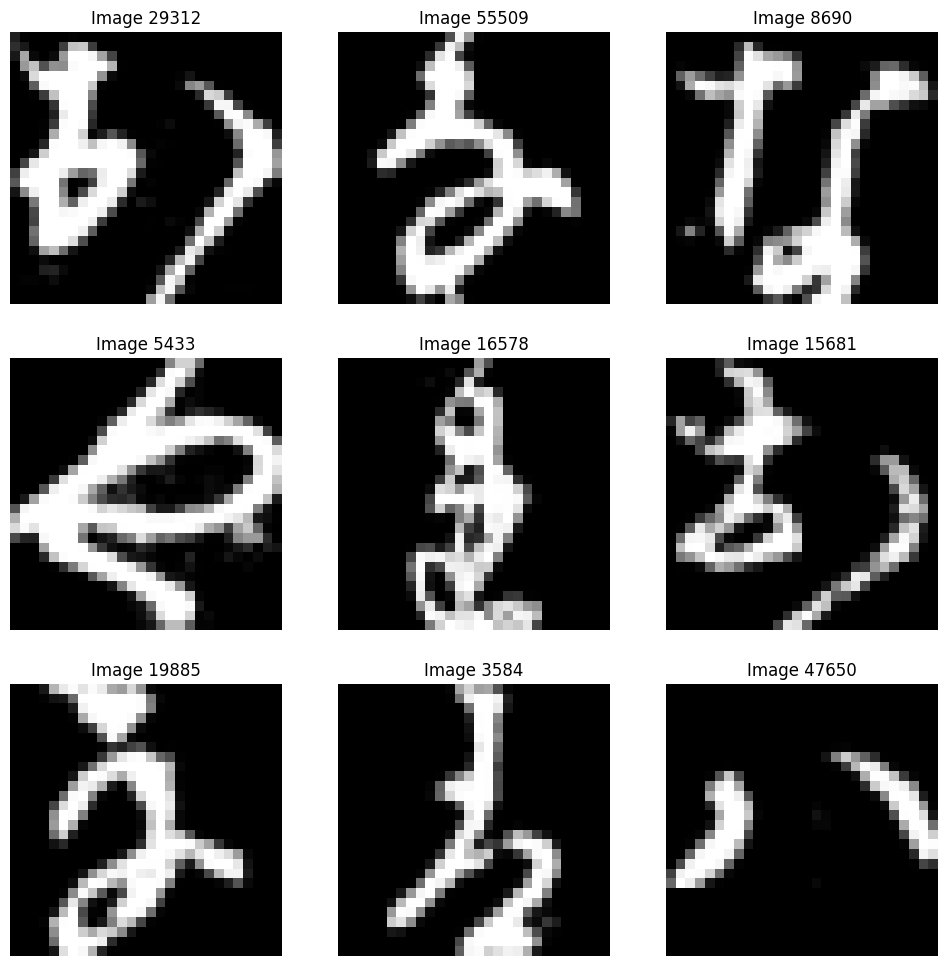

In [26]:
# Convertir los datos planos en imágenes 64x64
images_reshaped = images_normalized.reshape(-1, 28, 28)

# Índices aleatorios
random_indices = np.random.choice(len(images_reshaped), size=9, replace=False)

# Mostrar algunas imágenes aleatorias
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.imshow(images_reshaped[random_indices[i]], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Image {random_indices[i]}')

plt.show()

In [28]:
n_samples, width, height = images.shape
images_flat = images_reshaped.reshape(n_samples, width * height)

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preparar el rango de números de clusters a evaluar
range_values = range(2, 16)
silhouette_scores = []

# Calcular el score de silueta para cada número de clusters
for k in range_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(images_normalized)
    score = silhouette_score(images_normalized, kmeans.labels_)
    silhouette_scores.append(score)

# Gráfico de los scores de silueta
plt.figure(figsize=(8, 4))
plt.plot(range_values, silhouette_scores, "bo-")
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Imprimir el número óptimo de clusters
optimal_clusters = range_values[silhouette_scores.index(max(silhouette_scores))]
print(f'El número óptimo de clusters es: {optimal_clusters}')
